In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('/Users/linhle/Downloads/fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
test = pd.read_csv('/Users/linhle/Downloads/fraudTest.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
df = pd.concat([train, test])
df.shape

(1852394, 22)

In [3]:
df.trans_date_trans_time.unique()

array(['2019-01-01T00:00:18.000000000', '2019-01-01T00:00:44.000000000',
       '2019-01-01T00:00:51.000000000', ...,
       '2020-12-31T23:59:15.000000000', '2020-12-31T23:59:24.000000000',
       '2020-12-31T23:59:34.000000000'], dtype='datetime64[ns]')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

### Question 1. Calculate basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field 

In [5]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Question 2. Visualize distributions of data elements using histograms for key variables and predict which variables you expect to be most correlated with default/churn. 

In [4]:
# trans_date_trans_time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_ym'] = df['trans_date_trans_time'].dt.to_period('M')

In [6]:
df['trans_ym'].unique()

<PeriodArray>
['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
 '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
 '2020-10', '2020-11', '2020-12']
Length: 24, dtype: period[M]

In [9]:
df[df.is_fraud == 0].count()

trans_date_trans_time    1842743
cc_num                   1842743
merchant                 1842743
category                 1842743
amt                      1842743
first                    1842743
last                     1842743
gender                   1842743
street                   1842743
city                     1842743
state                    1842743
zip                      1842743
lat                      1842743
long                     1842743
city_pop                 1842743
job                      1842743
dob                      1842743
trans_num                1842743
unix_time                1842743
merch_lat                1842743
merch_long               1842743
is_fraud                 1842743
trans_date               1842743
trans_hour               1842743
trans_ym                 1842743
dtype: int64

In [7]:
# age = trans_date_trans_time - dob
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

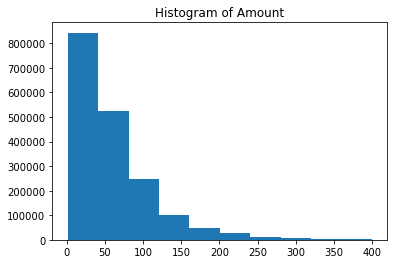

In [8]:
cols = ['amt', 'city_pop', 'age', 'is_fraud']
fig, ax = plt.subplots()
ax.hist(df.amt,range=(1,400))
ax.set_title('Histogram of Amount')
plt.show()

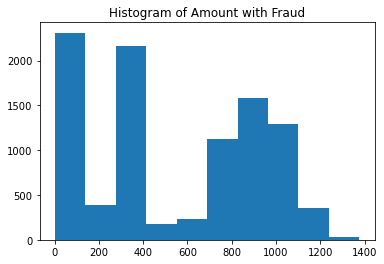

In [9]:
cols = ['amt', 'city_pop', 'age', 'is_fraud']
fig, ax = plt.subplots()
ax.hist(df[df.is_fraud ==1].amt)
ax.set_title('Histogram of Amount with Fraud')
plt.show()

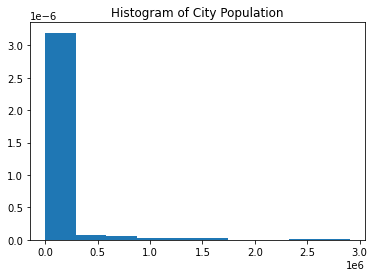

In [10]:
fig, ax = plt.subplots()
ax.hist(df.city_pop,density=True)
ax.set_title('Histogram of City Population')
plt.show()

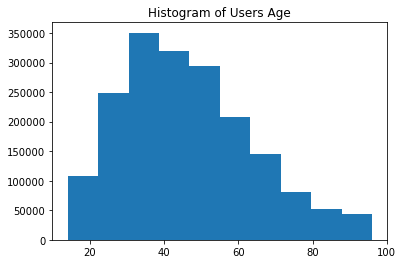

In [11]:
fig, ax = plt.subplots()
ax.hist(df.age)
ax.set_title('Histogram of Users Age')
plt.show()

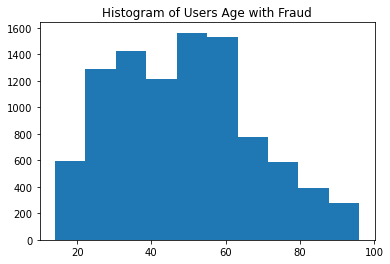

In [12]:
fig, ax = plt.subplots()
ax.hist(df[df.is_fraud == 1].age)
ax.set_title('Histogram of Users Age with Fraud')
plt.show()

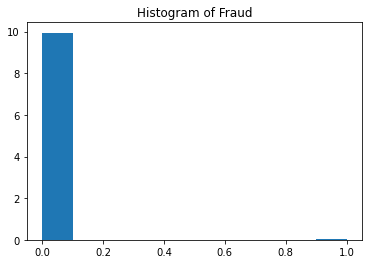

In [13]:
fig, ax = plt.subplots()
ax.hist(df.is_fraud,density = True)
ax.set_title('Histogram of Fraud')
plt.show()

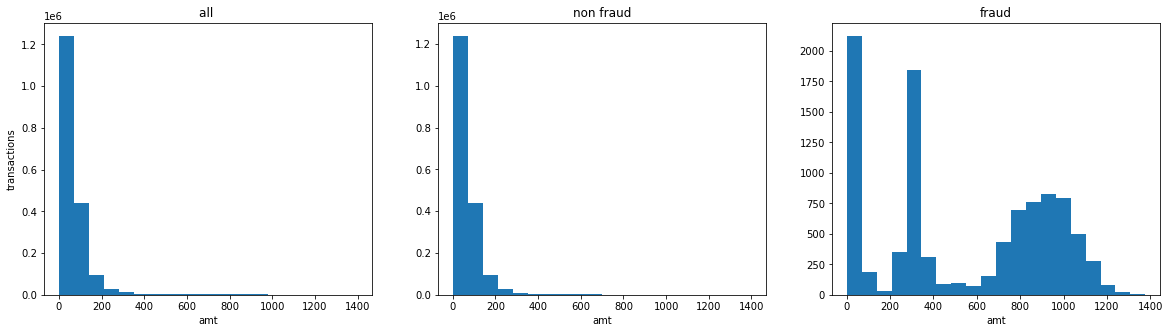

In [14]:
# amt
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('amt')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')

ax[0].hist(df.loc[df['amt']<=1400, 'amt'], bins=20)
ax[1].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==0), 'amt'], bins=20)
ax[2].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==1), 'amt'], bins=20);

#### Feature Engineering

In [15]:
df['agg'] = 1
df['index'] = df['trans_date_trans_time']
df = df.set_index('index').sort_index()

# rolling: 60 day transaction amount average by card number
df_amt_60d = df.groupby('cc_num')['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_amt_60d.columns = ['cc_num','trans_date','avg_amt_60d']
df_amt_60d['trans_date'] = df_amt_60d['trans_date'].dt.date
df_amt_60d = df_amt_60d.groupby(['cc_num','trans_date'])['avg_amt_60d'].min().reset_index()

# rolling: 60 day transactions by card number
df_60d = df.groupby('cc_num')['agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_60d.columns = ['cc_num','trans_date','60d']
df_60d['trans_date'] = df_60d['trans_date'].dt.date
df_60d = df_60d.groupby(['cc_num','trans_date'])['60d'].min().reset_index()

# merge by cc_num, trans_date
df = df.merge(df_amt_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')\
    .merge(df_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')
df[['avg_amt_60d','60d']]= df[['avg_amt_60d','60d']].fillna(0)

In [16]:
# one hot encoding
df = pd.concat([df, pd.get_dummies(df[['gender', 'category']], drop_first=True)], axis=1)

In [17]:
# category
(pd.crosstab(df['category'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
category,,
travel,0.031203,0.000084
grocery_net,0.034929,0.000094
health_fitness,0.066059,0.000100
food_dining,0.070462,0.000111
home,0.094578,0.000143
personal_care,0.070069,0.000157
entertainment,0.072245,0.000158
kids_pets,0.087143,0.000164
misc_pos,0.061492,0.000174


In [18]:
df[df.is_fraud == 1]['amt'].mean()

530.6614122888789

In [19]:
df[df.is_fraud == 0]['amt'].mean()

67.6512778613193

In [20]:
# gender
(pd.crosstab(df['gender'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
gender,,
M,0.449631,0.002565
F,0.545159,0.002645


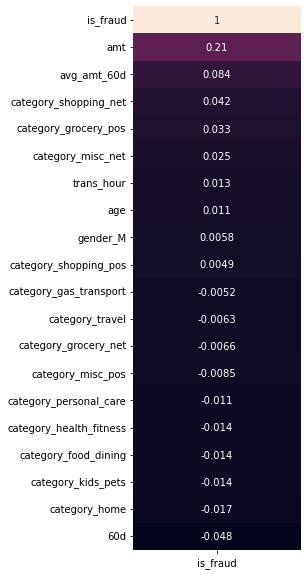

In [21]:
cols = ['amt', 'trans_hour', 'avg_amt_60d', '60d', 'age', 'gender_M', 
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']
import seaborn as sn
plt.figure(figsize=(3,10))
sn.heatmap(df[cols+['is_fraud']].corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cbar=False);

**Conclusion**: According to the correlation matrix, the credit card usage (*amt*), the cummulative credit card usage (*avg_amt_60d*), usage category have the strongest correlations with our response variable *is_fraud*.

### Question 3 + 4. Insert appropriate code to evaluate the credit card fraud detection performance of Decision Trees and Random Forest and Display the output visually using charts of your choosing and explain your choice. (ROC Curve, Confusion Matrix, Gains Table) 

### i. oversample
First, since the data with labelled *fraud* is significant less in our raw data, we will resample our input data so that our raw data has better fraud/not fraud ratios

In [22]:
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [23]:
fraud_oversample = df[df['is_fraud'] == 1].sample(df[df['is_fraud'] == 0]['amt'].count(), replace=True)
df_oversampled = pd.concat([df[df['is_fraud'] == 0], fraud_oversample], axis=0)
df_oversampled.is_fraud.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

###  ii. train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[cols], df_oversampled['is_fraud'], train_size=2/3)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
from sklearn import metrics
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    y_pred_proba = model.predict_proba(X_test)[::,1]
    skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba)
    plt.show()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.show()
    return model

### iii. decision trees

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = model_results(DecisionTreeClassifier(max_depth=3))

train:
[[1144389   83865]
 [ 201386 1027350]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89   1228254
           1       0.92      0.84      0.88   1228736

    accuracy                           0.88   2456990
   macro avg       0.89      0.88      0.88   2456990
weighted avg       0.89      0.88      0.88   2456990

test:
[[572669  41820]
 [100697 513310]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89    614489
           1       0.92      0.84      0.88    614007

    accuracy                           0.88   1228496
   macro avg       0.89      0.88      0.88   1228496
weighted avg       0.89      0.88      0.88   1228496



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dt, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

In [ ]:
plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dt, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

### iv. random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dr = model_results(RandomForestClassifier(n_estimators=10, max_depth=3))

In [ ]:
pd.Series(dr.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

### v. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
dl = model_results(LogisticRegression())

**Model Evaluation Choices:**

Here, I have chosen to inlcude all three ROC Curve, Confusion Matrix, and Gains Table) to be my model evaluation methods. I think that in order to achieve two purposes: i) compare the model performances amongst the different algorithms, and ii) decide if any model is actually good for its explanatory power, I need to access all three ROC Curve, Confusion Matrix, and Gains Table. I also included a feature importance chart, which helps me understand which features were made best use by the models.

The Gains Chart of both Decision Tree model and Random Forest model looks very similar. According to our Gains Charts, The Cum Lift of ~2 times for top four deciles, means that when selecting 40% of the records based on the model, one can expect ~2 times the total number of fraudulents events found than by randomly selecting 40%-of-file without a model.
The Confusion Matrices show us the number of correct and incorrect predictions are summarized with count values and broken down by each class. We can see that both of our model (Decision Tree and Random Forest) does very well - high precision rate (0.92 and 0.95), accuracy (both 0.88) and recall rate (0.84 and 0.81). At a first glance, there seems to not have much differences between the two models; however, we will later discuss a slight yet important difference in their recall rates that prompt us to choose one model over the other.
Lastly, the ROC curve and AUC tells us how good of a classifier our model is. Recall that AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier, so our models are very good classifiers with AUC of 0.94 and 0.96.






### Question 5. In addition to the spreadsheet/code or programming output you submit, include a separate written document of 250-500 words that summarizes:
a) your interpretation of the data via the Exploratory data analysis

b) your interpretation  of modeling output of Logistic Regression, Decision Tree and Random Forest

c) discuss which variables are most significant and any other unexpected insights.

Through my Exploratory Data Analysis, I have found a few interesting insights that could be incorporated into our model. As expected, there is no evidence of gender being an indicator of fraud, as the proportion of fraud per gender (Male/Female) is approximately the same. However, purchase categories seem to differ between fraudulent transactions and genuine transactions, with grocery, shopping, and mis being the most frequent categories to be frauded. We could also see that the distribution of transaction amount is lognormal, which is data skewed to the right. This is not surprising because credit card purchases cannot be negative and zero, and it is more infrequent for people to make big purchases than small purchases. However, when looking at the distribution of fraudulent transactions value, we could see that these transactions tend to have higher value, as the average of fraudulent transactions is $530.66, whereas the average of non-fraudulent transactions is only 67.65. I also found that my calculated feature *avg_amt_60d*, which is the average transaction amount in 60 days has a strong correlation with our predictor.

Consistently with the insights derived from our EDA, our models’ feature importance returns transaction amount to be the most important feature for both Decision Tree and Random Foreest model. However, our Decision Tree model also finds transaction hour and category (travel) to be important features, whereas Random Forest not only find the transaction hour to be a good feature, but it also finds the average transaction amount in 60 days, and category (pos in grocery) to be important. Since Decision Tree and Random Forest are both tree-based Machine Learning model, I was surprised that the features found to be important in the two models are so different. 

Both models have a high accuracy, both of 88%. However, when we look at the respective model performance, we could see that our decision tree model does a slightly better job at correctly identifying fraudulent transactions when there are actual fraudulent transactions( recall of 0.84 vs. random forest’s recall of 0.81). In a credit card fraud detection, I think we should use recall as our target metric to maximize, as the effect associated with false negatives (undetected fraudulent transactions) is so severe – we saw how valuable a fraudulent transaction can be. Out of the three models (Random Forest, Decision Tree and Logistic Regression), Random Forest’s AUC score is the best (0.96). Decision Tree’s AUC is 0.94 and Logistic Regression’s AUC is 0.92, which is not far behind. With these high AUC, we can trust the outputs of any of our model, and the choice of model should rely on the practical business needs. 

